<a href="https://colab.research.google.com/github/LoylP/K-meansClustering/blob/main/K_mean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#K_means-Clustering
# import 
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# prepare data
df = pd.read_csv('/content/Pokemon.csv')
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1']
df = df[types].drop(columns = drop_cols)
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
740,Skiddo,350,66,65,48,62,57,52
741,Gogoat,531,123,100,62,97,81,68
762,Clauncher,330,50,53,62,58,63,44
763,Clawitzer,500,71,73,88,120,89,59


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Defense')

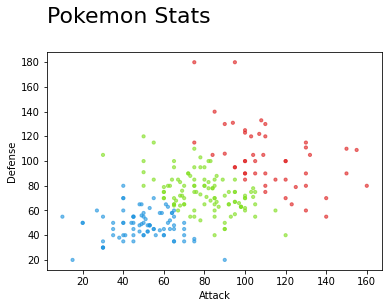

In [ ]:
# Predict with 2 variables
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

# Visualize with size is random
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)#s is size, c is color

# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

(0.0, 200.0)

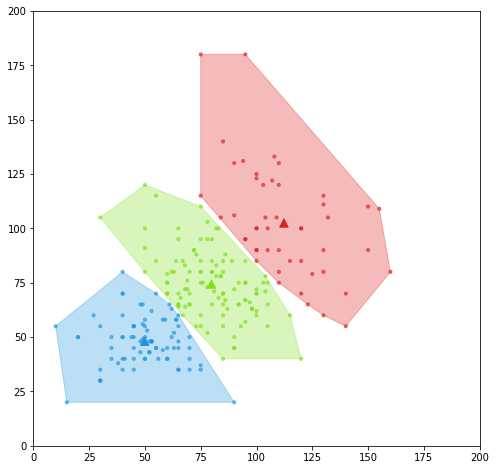

In [ ]:
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Attack', 'Defense']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
plt.xlim(0,200)
plt.ylim(0,200)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


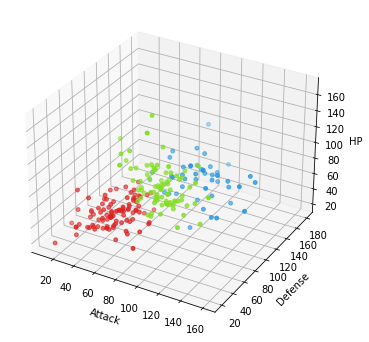

In [ ]:
# Predict with 3 variables
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense', 'HP']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Attack, df.Defense, df.HP, c=df.c, s=15)
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')
plt.show()